In [139]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

# 1. Optimizing Algorithms

In [244]:
def rosenbrock(tensor):
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations'.format(optimizer_name, len(iter_x)))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i= 0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

initial_state = np.array([-2,2])
def experiment(optimizer, hyperparameters, iters):
    steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer,
        hyperparameters,
        num_iter = iters
    )
    plot_rosenbrok(steps, optimizer.__name__)
    return steps

## 1.1 SGD

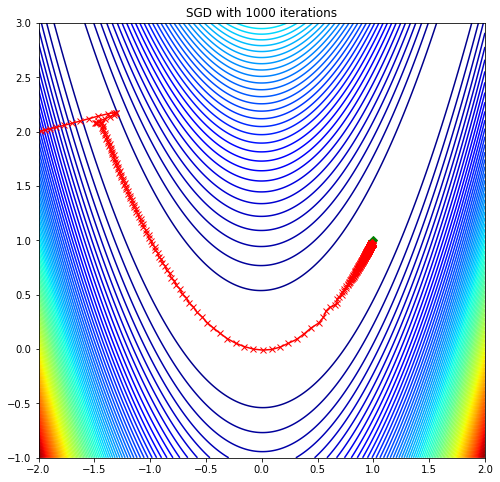

SGD last step: [0.9832789301872253,0.9780129790306091]


In [384]:
sgd_steps = experiment(
  optimizer = optim.SGD, 
  hyperparameters = {
    'lr':0.02, 
    'momentum': 0.8, 
    'weight_decay': 0
  }, 
  iters = 1000
)
print(f"SGD last step: [{sgd_steps[0][-1]},{sgd_steps[1][-1]}]")

## 1.2 Adadelta

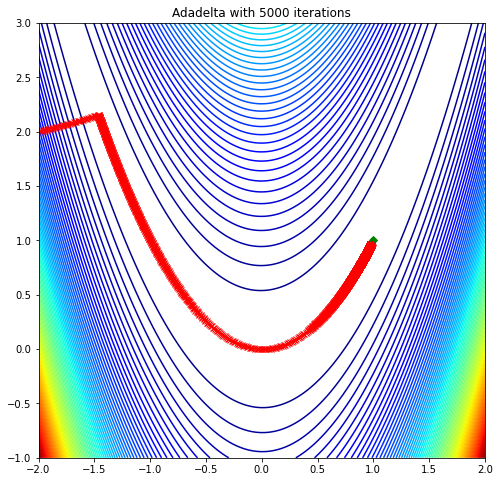

Adadelta last step: [0.9856567978858948,0.9577315449714661]


In [389]:
adadelta_steps = experiment(
  optimizer = optim.Adadelta,
  hyperparameters= {
    'rho': 1,
    'eps': 0.001,
    'lr': 0.0125,
    'weight_decay': 0
  },
  iters = 5000
)
print(f"Adadelta last step: [{adadelta_steps[0][-1]},{adadelta_steps[1][-1]}]")

While experimenting with **ASGD**, `lr`

## 1.3 ASGD 

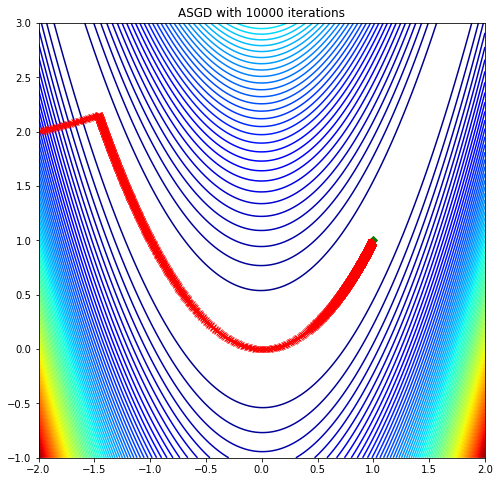

ASGD last step: [0.9815447330474854,0.986995279788971]


In [366]:
asgd_steps = experiment(
  optimizer = optim.ASGD, 
  hyperparameters = {
    'lr':0.0125,
    'lambd': 1e-4,
    'alpha': 0.75,
    'weight_decay': 0
  }, 
  iters = 10000
)
print(f"ASGD last step: [{asgd_steps[0][-1]},{asgd_steps[1][-1]}]")

## 1.4 Adagrad

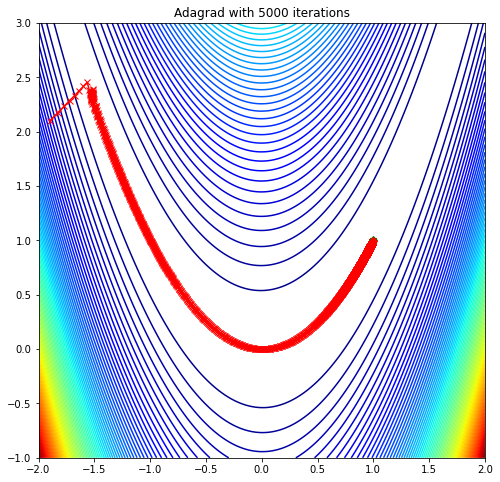

Adagrad last step: [0.9981511831283569,0.9962970018386841]


In [146]:
adagrad_steps = experiment(
  optimizer = optim.Adagrad, 
  hyperparameters = {
    'lr':0.1,
    'lr_decay': 0,
    'eps': 1e-10,
    'weight_decay': 0
  }, 
  iters = 5000
)
print(f"Adagrad last step: [{adagrad_steps[0][-1]},{adagrad_steps[1][-1]}]")

## 1.5 Adam

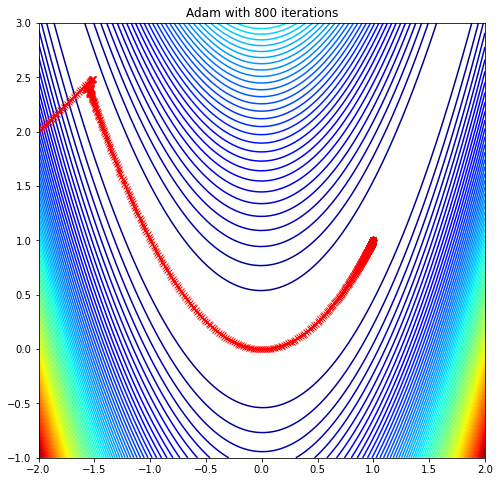

Adam last step: [0.9999542236328125,0.9999085068702698]


In [225]:
adam_steps = experiment(
  optimizer = optim.Adam, 
  hyperparameters = {
    'lr':0.015,
    'betas': (0.9, 0.999),
    'eps': 1e-6,
    'weight_decay': 0,
    'amsgrad': True
  }, 
  iters = 800
)
print(f"Adam last step: [{adam_steps[0][-1]},{adam_steps[1][-1]}]")

## 1.6 AdamW

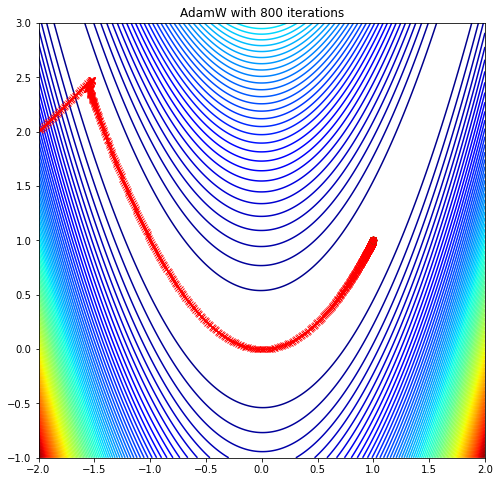

Adamw last step: [0.999744176864624,0.9994876384735107]


In [158]:
adamw_steps = experiment(
  optimizer = optim.AdamW, 
  hyperparameters = {
    'lr':0.0125,
    'betas': (0.9, 0.999),
    'eps': 1e-6,
    'weight_decay': 0,
    'amsgrad': False
  }, 
  iters = 800
)
print(f"Adamw last step: [{adamw_steps[0][-1]},{adamw_steps[1][-1]}]")

## 1.7 RAdam

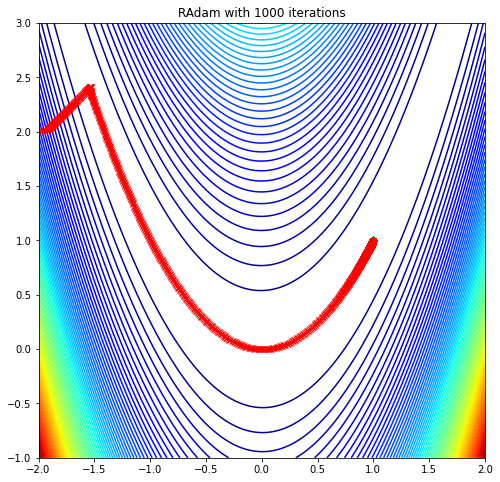

Sparse Adam last step: [0.9966575503349304,0.9933136701583862]


In [191]:
radam_steps = experiment(
  optimizer = optim.RAdam, 
  hyperparameters = {
    'lr':0.0175,
    'betas': (0.9, 0.999),
    'eps': 1e-8
  }, 
  iters = 1000
)
print(f"Sparse Adam last step: [{radam_steps[0][-1]},{radam_steps[1][-1]}]")

## 1.8 NAdam

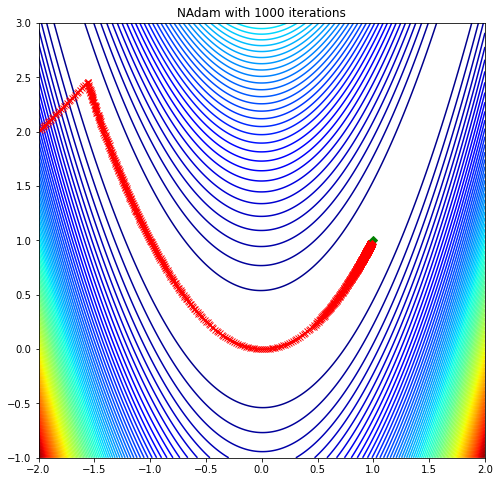

NAdam last step: [0.9843918681144714,0.966202437877655]


In [181]:
nadam_steps = experiment(
  optimizer = optim.NAdam, 
  hyperparameters = {
    'lr':0.015,
    'betas': (0.9, 0.999),
    'eps': 1e-8,
    'weight_decay': 0,
  }, 
  iters = 1000
)
print(f"NAdam last step: [{nadam_steps[0][-1]},{nadam_steps[1][-1]}]")

## 1.9 Adamax

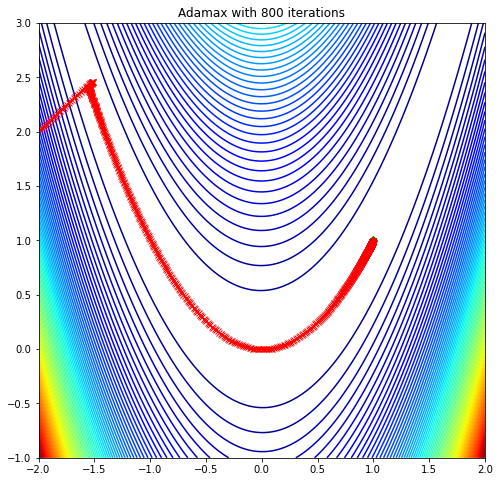

Adamax last step: [0.9980685114860535,0.996133029460907]


In [184]:
adamax_steps = experiment(
  optimizer = optim.Adamax, 
  hyperparameters = {
    'lr':0.015,
    'betas': (0.9, 0.999),
    'eps': 1e-8,
    'weight_decay': 0,
  }, 
  iters = 800
)
print(f"Adamax last step: [{adamax_steps[0][-1]},{adamax_steps[1][-1]}]")

## 1.10 RMSprop

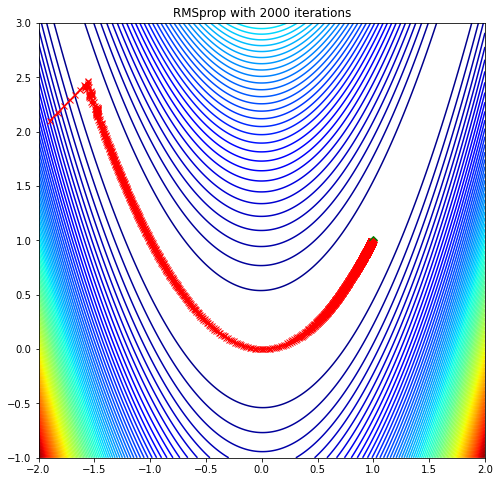

RMSprop last step: [0.9933595657348633,0.9843015074729919]


In [210]:
rmsprop_steps = experiment(
  optimizer = optim.RMSprop, 
  hyperparameters = {
    'lr': 1e-2,
    'momentum': 0,
    'alpha': 0.99,
    'eps': 1e-8,
    'centered': True,
    'weight_decay': 0
  }, 
  iters = 2000
)
print(f"RMSprop last step: [{rmsprop_steps[0][-1]},{rmsprop_steps[1][-1]}]")

## 1.11 Rprop

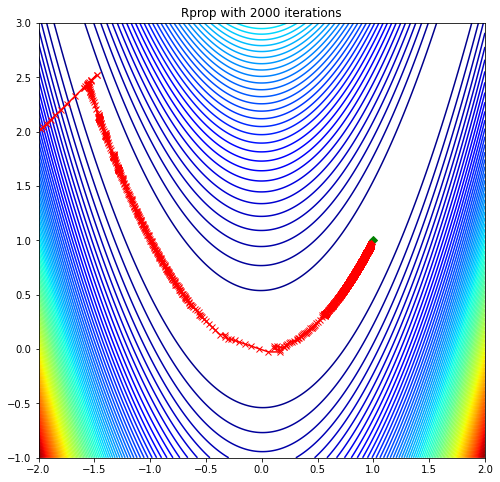

Rprop last step: [0.9829559922218323,0.9661926627159119]


In [219]:
rprop_steps = experiment(
  optimizer = optim.Rprop, 
  hyperparameters = {
    'lr': 0.02,
    'etas': (0.5, 1.2),
    'step_sizes': (1e-6, 50),
  }, 
  iters = 2000
)
print(f"Rprop last step: [{rprop_steps[0][-1]},{rprop_steps[1][-1]}]")

# 2. Advanced Learning Rate Scheduler

In [337]:
from torch.optim.lr_scheduler import *

initial_state = np.array([-2,2])

def execute_with_StepLR(func, initial_state, opt_type, config, num_iter):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = opt_type([x], **config)
    scheduler = StepLR(optimizer, step_size=300, gamma=0.3)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        scheduler.step()
        steps[:, i] = x.detach().numpy()
    return steps

def execute_with():
    pass

In `execute_with_hyperparameter_tuning()` function, I made the `lr` to decrease every 300 iterations.

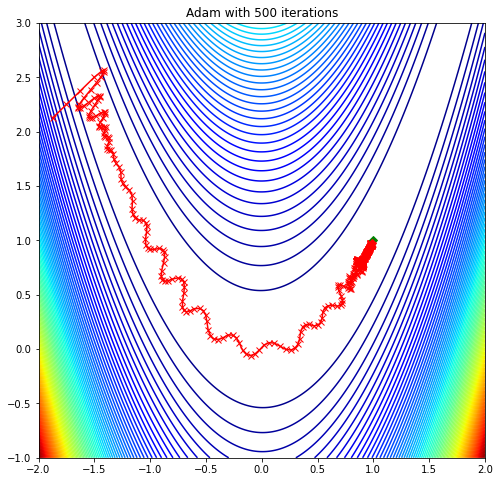

In [345]:
adam_hyp = execute_with_StepLR(
    rosenbrock,
    initial_state,
    opt_type = optim.Adam,
    config = {
        'lr':0.125,
        'betas': (0.9, 0.999),
        'eps': 1e-6,
        'weight_decay': 0,
        'amsgrad': True
    }, 
    num_iter = 500
)
plot_rosenbrok(adam_hyp, optim.Adam.__name__)

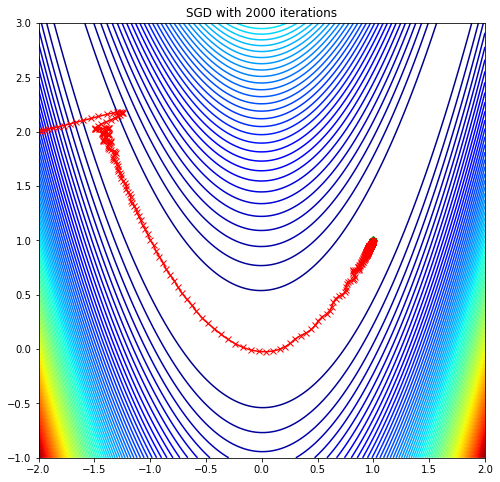

In [339]:
sgd_hyp = execute_with_StepLR(
  rosenbrock,
  initial_state,
  opt_type = optim.SGD, 
  config = {
    'lr':0.01, 
    'momentum': 0.9, 
    'weight_decay': 0.001
  }, 
  num_iter = 2000
)
plot_rosenbrok(sgd_hyp, optim.SGD.__name__)

# 3. Report

## 3.1 Optimizer Algorithms

From this observation, I realize that Adam, AdamW, RAdam, NAdam, and Adamax are the algorithms that requires no more than $1500$ iterations to converge. Only Adam, AdamW, and Adamax that require $800$ iterations to converge. I see these three algorithms to be more efficient compared to the other algorithms that I experimented on.

Other algorithms like SGD, ASGD, Adadelta, Adagrad, RMSprop, and Rprop are seemed to be less efficient than Adam and Adam's derived optimizers. Most of them require more than $4000$ iterations to get as close to the convergent point. These algorithms also require learning rates not too big and not too small, some where around $0.01$. If the learning rate it too big, the algorithm will jump out of the range. If the learning rate is too small, the algorithm will not reach the convergent point.

## 3.2 SGD & GD

![Gradient Descent Converging Figure](./gd.png "Gradient Descent Algorithm")

While experimenting with **SGD** above, I found that `lr` should be set around $[0.01, 0.019]$. `lr` greater than $0.1$ would bounce out of bound, and `lr` smaller than $0.001$ would not get help SGD to reach convergent point.
Even though the learning rate is set to $[0.01, 0.019]$, a high number of iterations is needed to reach the convergent point. 

As for the momentum value, I keep it to be under $0.9$. Otherwise, there would have a huge zigzag line when it's close to convergent point. 

As for the weight decay value, it would be better to keep it to $0$. Otherwise, it would be hard for the algorithm to converge.

!["SGD and GD Comparison"](./gd_graph.png "SGD and GD Comparison")

1. What is the relation between SGD and GD in our case, i.e. when the input is one-dimensional?  

  * In this observation, I found that SGD requires higher learning and more iterations to converge compared to GD. While GD requires a way smaller less learning rate and less iterations to converge.

  * Even though SGD requires more iterations, SGD updates its gradient as soon as a random data point is considered so the calculation speed is relatively fast. As oppose to GD, GD updates its gradient once all the data points in data set are considered and thus slows down the entire computation speed.
  
  * Even though Stochastic Gradient Descent algorithm requires more iterations to converge, a small set of data points randomly picked from the dataset is considered in each iteration. Though smaller data points won't take us to the converging point, at least it can help us approximate its gradient in a short period of time. Not only that, it doesn't suffer overfitting since SGD won't approximate really well given the number of data points considered.
  
  * As for the Gradient Descent algorithm, its gradient is updated once all the data points in a certain dataset are considered. Even though Gradient Descent guarantees converging, it takes a significant amount of time if the number of data points is siginificant enough, unlike SGD which requires a small amount of data points to update its gradient. Not only it takes a significant amount of time to converge, it might suffer overfitting since GD approximates very well and real world data is full of uncertainties.
  
  * Thus Algorithm like Stochastic Gradient Descent is more suitable in uncertain conditions compared to Gradient Descent.

![Stochastic Gradient Descent and Gradient Descent Algorithms](./sgd_vs_gd.png "Stocastic Gradient Descent and Gradient Descent Algorithms")

1. Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
  * I have not found any. However, in this case, in order for SGD to converge way faster than GD, I set the learning rate to be `0.01`, the momentum `0.9`, and the weight decay `0.001`. With only 1000 iterations, SGD converges.